# Task 4: time-delay embedding

## Part 1: periodic dataset

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/MyDrive/ColabNotebooks/Exercise5'
# import sys
# sys.path.append('/content/drive/My Drive/ColabNotebooks/Exercise5')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from utils import *
from lorenz_eqs import *

In [3]:
ds = np.loadtxt('takens_1.txt')

In [4]:
x1, x2 = np.hsplit(ds, 2)
assert(x1.shape[1] == 1 and x2.shape[1] == 1)

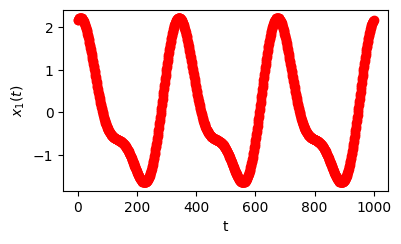

In [5]:
plt.figure(figsize=set_size(595, 0.5))
plt.plot(x1, 'ro')
plt.xlabel('t')
plt.ylabel(r'$x_1(t)$')
plt.tight_layout()
plt.savefig('figures/Ex5_Task4_Part1_A.pdf')

In [20]:
delta = 20
x1_delay = time_delay(x1, delta, n_delays=1)

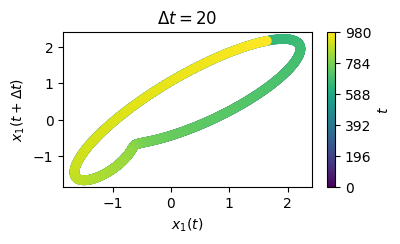

In [19]:
plt.figure(figsize=set_size(595, 0.5))
plt.scatter(*x1_delay, c=np.linspace(0, 1, len(x1)-delta))
plt.xlabel(r'$x_1(t)$')
plt.ylabel(r'$x_1(t+\Delta t)$')
plt.title(rf'$\Delta t = {delta}$')
cbar = plt.colorbar(label=r'$t$', ticks=np.linspace(0, 1, 6))
cbar.ax.set_yticklabels(list(map(int, np.linspace(0, len(x1)-delta, 6))))
plt.tight_layout()
plt.savefig('figures/Ex5_Task4_Part1_B.pdf')

According to Takens' theorem, we should need $$2d+1=2(1)+1=3$$ coordinates to embed $x_1$. In our case we have done it only with 2 coordinates.

## Lorenz attractor

In [8]:
t0 = 0.0            # initial time
tf = 1000           # final time
n_steps = 100000    # number of integration steps (fixed for comparison purposes)

ts = np.linspace(t0, tf, n_steps)

In [9]:
x, y, z = solve_lorenz_eqs(ts=ts, x0=[10, 10, 10],
                              sigma=10, beta=8./3., rho=28)

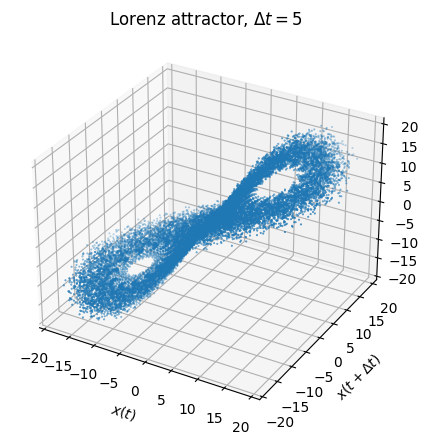

In [10]:
delta_t = 5

fig = plt.figure(figsize=set_size(width=595, fraction=1))
ax = fig.add_subplot(111, projection='3d')
lorenz_plot = ax.scatter(
    x[:-2*delta_t:delta_t].flatten(),
    x[delta_t:-delta_t:delta_t].flatten(),
    x[2*delta_t::delta_t].flatten(),
    s=.2
)
ax.set_xlabel(r'$x(t)$')
ax.set_ylabel(r'$x(t+\Delta t)$')
ax.set_zlabel(r'$x(t+2\Delta t)$')
ax.set_title(rf'Lorenz attractor, $\Delta t={delta_t}$')
fig.savefig('figures/Ex5_Task4_Part2_X.png')

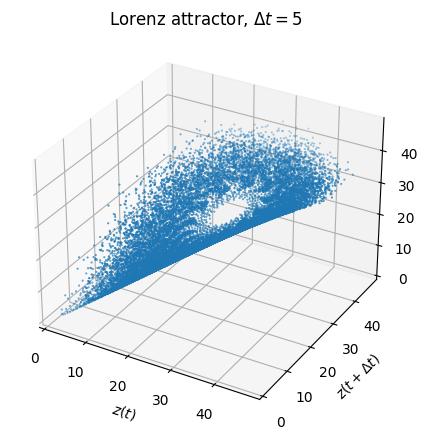

In [11]:
fig = plt.figure(figsize=set_size(width=595, fraction=1))
ax = fig.add_subplot(111, projection='3d')
lorenz_plot = ax.scatter(
    z[:-2*delta_t:delta_t].flatten(),
    z[delta_t:-delta_t:delta_t].flatten(),
    z[2*delta_t::delta_t].flatten(),
    s=.2
)
ax.set_xlabel(r'$z(t)$')
ax.set_ylabel(r'$z(t+\Delta t)$')
ax.set_zlabel(r'$z(t+2\Delta t)$')
ax.set_title(rf'Lorenz attractor, $\Delta t={delta_t}$')
fig.savefig('figures/Ex5_Task4_Part2_Z.png')

## Extra (does not work)

In [12]:
x1 = x[:-2*delta_t:delta_t]
x2 = x[delta_t:-delta_t:delta_t]
x3 = x[2*delta_t::delta_t]

xx = np.hstack((x1, x2, x3))
xold = xx[:-1, :]
xnew = xx[1:, :]

In [13]:
L_root = 400
xl = np.linspace(-20, 20, int(L_root**(1/3)))

centers = np.vstack([np.array([x, y, z]) for x in xl for y in xl for z in xl])

In [14]:
 # we choose eps to be roughly the distance between centers
eps = 40 / int(L_root**(1/3)) 
eps

5.714285714285714

We want to fit $$f_j(\vec{x}) = \sum_l c_{lj}\phi_{l}(||\vec{x}-\vec{x}_l||),$$
where $\phi_l$ is the $l$-th radial basis function, i.e. the radial basis function centered in $\vec{x}_l$, and here $f_j$ is the $j$-th component of the vector field. In matrix notation
$$\vec{f}(\vec{x}) = \vec{\phi}(\vec{x})\mathbf{C}^T$$

In [15]:
v = (xnew-xold)/delta_t  # vector field we want to approximate

In [16]:
C = get_rbf_coeffs(xold, v, centers, eps)
C.shape

(3, 343)

In [17]:
t0 = 0
tf = 1000
time = np.linspace(t0, tf, 1000)  # times for which we want the solution
y0 = np.array([10, 10, 10]) # initial condition

sol = solve_ivp(nonlinear_function, (t0, tf), y0, args=([C, centers, eps, True]), t_eval=time)

ValueError: operands could not be broadcast together with shapes (9,) (3,) 

In [ ]:
print(sol.y)
approx = np.vsplit(sol.y, 3)

In [ ]:
fig = plt.figure(figsize=set_size(width=595, fraction=1))
ax = fig.add_subplot(111, projection='3d')
lorenz_plot = ax.scatter(*approx)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title(rf'Lorenz attractor, estimated solution')
# fig.savefig('./Ex5_Task4_Part2_X.png')